<a href="https://colab.research.google.com/github/nikhildhavale/pythonLearning/blob/main/supportvectormachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature matrix shape: (569, 30)
Target vector shape: (569,)
Target names (0, 1): ['malignant' 'benign']

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Class distribution (0 = malignant, 1 = benign):
target
1    357
0    212
Name: count, dtype: int64

Shapes after train-test split:
X_train: (455, 30)
X_test : (114, 30)
y_train: (455,)
y_test : (114,)

Feature scaling complete.
Mean of first scaled feature (train): -4.337433952909183e-15
Std  of first scaled feature (train): 1.0

SVM model trained.

Model Accuracy:
Training accuracy: 0.982418
Test accuracy    : 0.982456

Classification Report (on Test Set):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix (raw counts):
[[41  1]
 [ 1 71]]


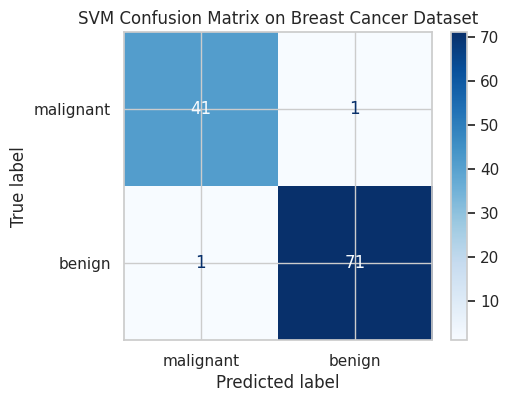


Summary:
We trained an SVM (RBF kernel) on the scaled Breast Cancer dataset,
achieved good accuracy on both train and test sets, and inspected the
confusion matrix and classification report to understand performance.


In [ ]:
# ---------------------------------------------
# Support Vector Machine on Breast Cancer Dataset
# Using scikit-learn & Google Colab
# ---------------------------------------------

# 1. IMPORT LIBRARIES
# -------------------
# NumPy & Pandas for data handling, Matplotlib & Seaborn for plots,
# scikit-learn for dataset, preprocessing, modeling, and evaluation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# For nicer plots
sns.set(style="whitegrid")


# 2. LOAD THE BREAST CANCER DATASET
# ---------------------------------
# This dataset comes built-in with scikit-learn.
# It contains 30 numeric features computed from digitized images of breast masses.
# Target: 0 = malignant, 1 = benign

data = load_breast_cancer()

# Features (X) and target (y)
X = data.data          # shape: (n_samples, n_features)
y = data.target        # shape: (n_samples,)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Target names (0, 1):", data.target_names)


# 3. CONVERT TO A PANDAS DATAFRAME (OPTIONAL BUT NICE FOR EXPLORATION)
# --------------------------------------------------------------------
# This step makes it easier to inspect columns and do EDA if needed.

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nClass distribution (0 = malignant, 1 = benign):")
print(df['target'].value_counts())


# 4. TRAIN–TEST SPLIT
# -------------------
# We split the data into:
#  - Training set: used to train the SVM model
#  - Test set: used to evaluate how well the model generalizes
#
# stratify=y ensures the class proportion is similar in both train and test.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 80% train, 20% test
    random_state=42,      # for reproducibility
    stratify=y
)

print("\nShapes after train-test split:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


# 5. FEATURE SCALING (VERY IMPORTANT FOR SVM!)
# -------------------------------------------
# SVM is sensitive to the scale of the features.
# StandardScaler transforms each feature to have mean 0 and std 1.
# We fit the scaler on TRAIN data only, then apply it to both train and test.

scaler = StandardScaler()

# Fit on training data, then transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling complete.")
print("Mean of first scaled feature (train):", X_train_scaled[:, 0].mean())
print("Std  of first scaled feature (train):", X_train_scaled[:, 0].std())


# 6. CREATE AND TRAIN THE SVM MODEL
# ---------------------------------
# We will use the SVC (Support Vector Classifier) with an RBF kernel (default).
# Key parameters:
#   C : Regularization parameter (controls margin vs misclassification trade-off)
#   gamma : Controls the influence of single training examples
#
# You can experiment with different C and gamma values.

svm_clf = SVC(
    kernel='rbf',     # 'linear', 'poly', 'rbf', 'sigmoid' are common options
    C=1.0,            # default C
    gamma='scale',    # default gamma
    probability=False # we don't need probabilities right now
)

# Train the SVM on the scaled training data
svm_clf.fit(X_train_scaled, y_train)

print("\nSVM model trained.")


# 7. PREDICTIONS ON TRAIN AND TEST SETS
# -------------------------------------
y_train_pred = svm_clf.predict(X_train_scaled)
y_test_pred = svm_clf.predict(X_test_scaled)


# 8. EVALUATION: ACCURACY
# -----------------------
# Accuracy = (Correct predictions) / (Total samples)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nModel Accuracy:")
print(f"Training accuracy: {train_accuracy:.6f}")
print(f"Test accuracy    : {test_accuracy:.6f}")


# 9. EVALUATION: CLASSIFICATION REPORT
# ------------------------------------
# Gives precision, recall, f1-score for each class.
# Useful for understanding how well the model performs on each class.

print("\nClassification Report (on Test Set):")
print(classification_report(y_test, y_test_pred, target_names=data.target_names))


# 10. CONFUSION MATRIX
# --------------------
# Confusion matrix shows:
#   [ [TN, FP],
#     [FN, TP] ]
#
# Where:
#   TN = True Negatives  (correctly predicted class 0)
#   FP = False Positives (incorrectly predicted class 1 when it was 0)
#   FN = False Negatives (incorrectly predicted class 0 when it was 1)
#   TP = True Positives  (correctly predicted class 1)

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix (raw counts):")
print(cm)

# Visualize the confusion matrix nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("SVM Confusion Matrix on Breast Cancer Dataset")
plt.show()


# 11. OPTIONAL: SIMPLE DECISION BOUNDARY EXPLANATION (TEXT)
# ---------------------------------------------------------
# Note:
#  - In high dimensions (30 features here), we can't plot the exact decision boundary.
#  - Conceptually, SVM is trying to find a hyperplane that best separates malignant vs benign
#    with maximum margin, while allowing some misclassifications depending on C.
#
# If you want to actually visualize decision boundaries, you would reduce the data to 2D
# using PCA and then plot; that is more advanced and can be added as a separate demo.

print("\nSummary:")
print("We trained an SVM (RBF kernel) on the scaled Breast Cancer dataset,")
print("achieved good accuracy on both train and test sets, and inspected the")
print("confusion matrix and classification report to understand performance.")